## Ankle Calculation
With this Notebook we read out the Data from every .csv-File in the given directory (csv_files), store it into multiple DFs and visulize it. 

* We get an initial overview of the data and their anomalies. 
* We select the relevant points for the upcoming tasks and compare them in different situations.
* We carry out an initial univariate outlier detection, in which we identify and visualize abnormalities.

Requirements
* .csv-Files

In [418]:
csvFilesPath = os.getcwd()+"/csv_files/finalCsv/"
csvFiles = os.listdir(csvFilesPath)
for fileName in csvFiles:
    pre, ext = os.path.splitext(fileName)
    print(pre)

Gehen_1
Gehen_4
Gehen_5
Gehen_7
Joggen_1
Joggen_4
Joggen_5
Joggen_7
Laufen_1
Laufen_4
Laufen_5
Laufen_7


In [419]:
RUN = "Laufen_7" 

## Setup

In [420]:
import os
import pandas as pd
import numpy as np
import warnings
import pickle
warnings.filterwarnings('ignore')

### Get Data
* Reading Data from all CSV Files and save it to multiple Dataframes. 
* Storing every df into a Dictionary for further purposes

In [421]:
df_dict_all = {}

csvFilesPath = os.getcwd()+"/csv_files/finalCsv/"
csvFiles = os.listdir(csvFilesPath)

for fileName in csvFiles:
    #print(fileName)
    pre, ext = os.path.splitext(fileName)
    file = csvFilesPath + fileName

    # if "Joggen" in pre:
    #     df = pd.read_csv(file)
    #     df_dict_all[pre] = df
    #     if len(df) < 1798:
    #         print(pre)

    df = pd.read_csv(file)
    df_dict_all[pre] = df
    if len(df) < 1798:
        print(pre)

amountDataframes = len(df_dict_all)
amountColumns = len(df.columns.tolist())
amountRows = len(df)
amountData = amountDataframes*amountColumns*amountRows

print(f'{amountDataframes} DataFrames')
print(f'{amountColumns} columns per Dataframe ')
print(f'{amountRows} rows per Dataframe')
print(f'{amountData} DataCells')

12 DataFrames
41 columns per Dataframe 
1799 rows per Dataframe
885108 DataCells


* 10 Runner
* 3 paces per runner
* 2 perspectives per pace 
> 10 x 3 x 2 = 60 Dataframes


* 1800 Frames per Dataframe --> 1800 Frames / 60 seconds = 30 Frames per Second
* 132 Columns per Dataframe --> 33 Pivot points x 4 Columns per Pivotpoint


> Für die 33 relevanten Keypoints gibt es in jedem Dataframe 4 Spalten mit Werten:
* x -->  Bildbreite (Werte normalisiert auf [0,0, 1,0])
* y -->  Bildhöhe (Werte normalisiert auf [0,0, 1,0])
* z -->  Bildtiefe (Werte normalisiert auf [0,0, 1,0])
* v -->  Sichtbarkeit (Werte normalisiert auf [0,0, 1,0]) 



In [422]:
df_dict_all.keys()

dict_keys(['Gehen_1', 'Gehen_4', 'Gehen_5', 'Gehen_7', 'Joggen_1', 'Joggen_4', 'Joggen_5', 'Joggen_7', 'Laufen_1', 'Laufen_4', 'Laufen_5', 'Laufen_7'])

In [423]:
df = df_dict_all[RUN]
df.columns
df = df * -1
df = df + 1
df.head()

,Unnamed: 0,x_left_hip,y_left_hip,z_left_hip,v_left_hip,x_right_hip,y_right_hip,z_right_hip,v_right_hip,x_left_knee,...,z_right_heel,v_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,v_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index,v_right_foot_index
0,1,0.523005,0.520601,0.534695,0.002061,0.513634,0.520394,0.451475,0.004058,0.616398,...,0.433334,0.073400,0.771200,0.239181,0.516166,0.022831,0.249130,0.242396,0.442091,0.125857
1,0,0.526148,0.509806,0.448570,0.001962,0.522748,0.509253,0.526045,0.004069,0.613792,...,0.457845,0.071119,0.760432,0.237727,0.461112,0.021738,0.261447,0.253733,0.476812,0.120218
2,-1,0.526087,0.502001,0.459315,0.001808,0.541296,0.500603,0.520144,0.003713,0.474057,...,0.481364,0.069554,0.228539,0.262885,0.435870,0.020241,0.722200,0.228505,0.485154,0.111221
3,-2,0.521672,0.496866,0.503423,0.001661,0.544999,0.494184,0.467029,0.003373,0.494113,...,0.474085,0.066477,0.216440,0.279880,0.456306,0.019259,0.688606,0.214217,0.483468,0.102607
4,-3,0.512794,0.495267,0.519285,0.001508,0.548210,0.492444,0.453893,0.003044,0.515741,...,0.469872,0.064645,0.234391,0.303287,0.497605,0.018816,0.639030,0.206153,0.437132,0.094893


## Analyse und Visualisierung

### Bestimmung des Zeitpunkts der Winkelberechnung

### Vergleich meherer Gelenkpunkte 
* seitliche Ansicht und y-Bewegung zur Feststellung des Zeitpunkts für die Berechnung des Winkels
* hintere Ansicht und x-Bewegung zur Berechnung des Winkels

In [424]:
import pandas as pd
import plotly.express as px
import matplotlib as mpl

joints_x = ["z_left_knee", "z_left_ankle", "z_left_heel"]
joints_y = ["y_left_heel", "y_left_foot_index"]

fig_knee = px.line(df, y="y_left_heel", title='Position Rückfußwinkel')
fig_ankle = px.line(df, y="y_left_foot_index")
fig_ankle.update_traces(line= dict(
    color = "green"
))

fig_knee.add_trace(fig_ankle.data[0], )
fig_knee.show()

ERKENTNISSE: Vorgehen für Berechnung des Zeitpunkts

Wie erkennt das modell die richtigen Abschnitte???
* Erkennen wann Ferse aufsetzt
* Erkennen wann Fußspitze ferse schneidet

evtl. mithilfe der Außschläge herausfinden in welchem Frameabschnitte die genannten ereignisse auftreten


 *Auffällig: das Muster lässt eigentlich vermuten, dass die Werte vermutlich spiegelverkehrt sind * 


In [425]:
import pandas as pd
import plotly.express as px
import matplotlib as mpl

joints_x = ["z_left_knee", "z_left_ankle", "z_left_heel"]
joints_y = ["y_left_heel", "y_left_foot_index"]
#df_backRight = df[backAnkleRight]

fig_knee = px.line(df, y="z_left_knee", title='Position Rückfußwinkel')
fig_ankle = px.line(df, y="z_left_ankle")
fig_heel = px.line(df, y="z_left_heel")
fig_heel_side = px.line(df, y="y_left_heel")

fig_ankle.update_traces(line= dict(
    color = "green"
))
fig_heel.update_traces(line= dict(
    color = "orange"
))
fig_heel_side.update_traces(line= dict(
    color = "red"
))
fig_knee.add_trace(fig_ankle.data[0], )
fig_knee.add_trace(fig_heel.data[0], )
fig_knee.add_trace(fig_heel_side.data[0], )

fig_knee.show()

## Functions for Calculation

In [426]:
def getPointsForAngleDirection(x_points,y_points):
        for i, y in enumerate(y_points):
            if y == max(y_points):
                x = x_points[i]
                return (x,y)


def intersection_points(slope, intercept, x0, y0, radius):
    x_points = []
    y_points = []

    a = 1 + slope**2
    b = -2.0*x0 + 2*slope*(intercept - y0)
    c = x0**2 + (intercept-y0)**2 - radius**2
 
    delta = b**2 - 4.0*a*c  
    x1 = (-b + np.sqrt(delta)) / (2.0 * a)
    x2 = (-b - np.sqrt(delta)) / (2.0 * a)
 
    x_points.append(x1)
    x_points.append(x2)
 
    y1 = slope*x1 + intercept
    y2 = slope*x2 + intercept
 
    y_points.append(y1)
    y_points.append(y2)
 
    return x_points, y_points

def get_angle(x, y, x0, y0, radius):
 
    base = x - x0
    hypotenuse = radius
    theta = np.arccos(base / hypotenuse)
    if y-y0 < 0:
        theta = 2*np.pi - theta
    return theta

import matplotlib.pyplot as plt
import numpy as np

def calcAngle(frame):

    knee_x = df["z_left_knee"][frame]
    knee_y = df["y_left_knee"][frame]
    ankle_x = df["z_left_ankle"][frame]
    ankle_y = df["y_left_ankle"][frame]
    heel_x = df["z_left_heel"][frame]
    heel_y = df["y_left_heel"][frame]

    foot_y = df["y_left_foot_index"][frame]

    a1, b1 = (ankle_y-knee_y)/(ankle_x-knee_x), knee_y-(ankle_y-knee_y)/(ankle_x-knee_x)*knee_x
    a2, b2 = (heel_y-ankle_y)/(heel_x-ankle_x), ankle_y-(heel_y-ankle_y)/(heel_x-ankle_x)*ankle_x

    x0 = (b2-b1)/(a1-a2)
    y0 = a1*x0 + b1

    r = 0.2
    
    x_points1, y_points1 = intersection_points(a1, b1, x0, y0, r)
    x_points2, y_points2 = intersection_points(a2, b2, x0, y0, r)

    blueLinePointAbove = getPointsForAngleDirection(x_points1, y_points1)
    orangeLinePointAbove = getPointsForAngleDirection(x_points2, y_points2)
    
    #If blue line starts left from orange line (above) the angle should be negative
    supination = False
    if blueLinePointAbove[0] > orangeLinePointAbove[0]:
        supination = True

    x_points = x_points1+ x_points2
    y_points = y_points1+ y_points2

    theta_list = []

    for i in range(len(x_points)):
        x = x_points[i]
        y = y_points[i]
    
        theta_list.append(get_angle(x, y, x0, y0, r))
    # supination = False
    if knee_x  > ankle_x:
        if ankle_x < heel_x and ankle_y > heel_y:
            # print(1)
            p1 = theta_list[1]
            p2 = theta_list[2]
            # supination = True
        if ankle_x < heel_x and ankle_y < heel_y:
            # print(2)
            p1 = theta_list[3]
            p2 = theta_list[1]
            # p1 = theta_list[1]
            # p2 = theta_list[2] --> hat nicht funktioniert aus irgendeinem grund
        if ankle_x > heel_x and ankle_y > heel_y:
            # print(3)
            p1 = theta_list[3]
            p2 = theta_list[1]
        if ankle_x > heel_x and ankle_y < heel_y:
            # print(4)
            p1 = theta_list[3]
            p2 = theta_list[1]
    else:
        if ankle_x > heel_x and ankle_y > heel_y:
            # print(5)
            p1 = theta_list[3]
            p2 = theta_list[0]
            # supination = True
        if ankle_x > heel_x and ankle_y < heel_y:
            # print(6)
            p1 = theta_list[2]
            p2 = theta_list[0]
        if ankle_x < heel_x and ankle_y > heel_y:
            # print(7)
            p1 = theta_list[0]
            p2 = theta_list[2]
        if ankle_x < heel_x and ankle_y < heel_y:
            # print(8)
            p1 = theta_list[3]
            p2 = theta_list[0]
            # p1 = theta_list[0]
            # p2 = theta_list[2] --> hat nicht funktioniert aus irgendeinem grund
        
    angle_in_degree = round(np.rad2deg(abs(p1-p2)), 1)

    if supination == True:
        angle_in_degree = angle_in_degree*-1
    return angle_in_degree

import matplotlib.pyplot as plt
import numpy as np

def drawAngle(frame):
    knee_x = df["z_left_knee"][frame]
    knee_y = df["y_left_knee"][frame]
    ankle_x = df["z_left_ankle"][frame]
    ankle_y = df["y_left_ankle"][frame]
    heel_x = df["z_left_heel"][frame]
    heel_y = df["y_left_heel"][frame]

    foot_y = df["y_left_foot_index"][frame]

    a1, b1 = (ankle_y-knee_y)/(ankle_x-knee_x), knee_y-(ankle_y-knee_y)/(ankle_x-knee_x)*knee_x
    a2, b2 = (heel_y-ankle_y)/(heel_x-ankle_x), ankle_y-(heel_y-ankle_y)/(heel_x-ankle_x)*ankle_x

    l = np.linspace(-6, 6, 100)
    
    plt.figure(figsize=(8, 8))

    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.title('Plot an angle using Python')
    plt.plot(l, l*a1+b1)
    plt.plot(l, l*a2+b2)
    
    x0 = (b2-b1)/(a1-a2)
    y0 = a1*x0 + b1
    plt.scatter(x0, y0, color='midnightblue')

    plt.scatter(knee_x, knee_y, color='blue')
    plt.scatter(ankle_x, ankle_y, color='green')
    plt.scatter(heel_x, heel_y, color='violet')
    plt.text(knee_x, knee_y, 'knee', color='blue')
    plt.text(ankle_x, ankle_y, 'ankle', color='green')
    plt.text(heel_x, heel_y, 'heel', color='violet')

    plt.axhline(y=foot_y, color='black', linestyle='dotted')
    #plt.text(foot_y, 0, 'heel', color='violet')

    theta = np.linspace(0, 2*np.pi, 100)
    r = 0.2
    x1 = r * np.cos(theta) + x0
    x2 = r * np.sin(theta) + y0
    plt.plot(x1, x2, color='green', linestyle='dotted')

    x_points1, y_points1 = intersection_points(a1, b1, x0, y0, r)
    x_points2, y_points2 = intersection_points(a2, b2, x0, y0, r)

    blueLinePointAbove = getPointsForAngleDirection(x_points1, y_points1)
    orangeLinePointAbove = getPointsForAngleDirection(x_points2, y_points2)
    
    supination = False
    if blueLinePointAbove[0] > orangeLinePointAbove[0]:
        supination = True
    

    x_points = x_points1+ x_points2
    y_points = y_points1+ y_points2
    
    plt.scatter(x_points[1], y_points[1], color='crimson')
    plt.scatter(x_points[2], y_points[2], color='crimson')
    plt.scatter(x_points[3], y_points[3], color='crimson')
    plt.scatter(x_points[0], y_points[0], color='crimson')
    
    plt.text(x_points[1], y_points[1], '  P1', color='black')
    plt.text(x_points[2], y_points[2], '  P2', color='black')
    plt.text(x_points[3], y_points[3], '  P3', color='black')
    plt.text(x_points[0], y_points[0], '  P0', color='black')
    
    theta_list = []
    
    for i in range(len(x_points)):
        x = x_points[i]
        y = y_points[i]
        theta_list.append(get_angle(x, y, x0, y0, r))
    
    print(x_points, y_points)


    if knee_x  > ankle_x:
        if ankle_x < heel_x and ankle_y > heel_y:
            print(1)
            p1 = theta_list[1]
            p2 = theta_list[2]
            # supination = True
        if ankle_x < heel_x and ankle_y < heel_y:
            print(2)
            p1 = theta_list[3]
            p2 = theta_list[1]
            # p1 = theta_list[1]
            # p2 = theta_list[2] --> hat nicht funktioniert aus irgendeinem grund
        if ankle_x > heel_x and ankle_y > heel_y:
            print(3)
            p1 = theta_list[3]
            p2 = theta_list[1]
        if ankle_x > heel_x and ankle_y < heel_y:
            print(4)
            p1 = theta_list[3]
            p2 = theta_list[1]
    else:
        if ankle_x > heel_x and ankle_y > heel_y:
            print(5)
            p1 = theta_list[3]
            p2 = theta_list[0]
            # supination = True
        if ankle_x > heel_x and ankle_y < heel_y:
            print(6)
            p1 = theta_list[2]
            p2 = theta_list[0]
        if ankle_x < heel_x and ankle_y > heel_y:
            print(7)
            p1 = theta_list[0]
            p2 = theta_list[2]
            print(theta_list[3])

        if ankle_x < heel_x and ankle_y < heel_y:
            print(8)
            p1 = theta_list[3]
            p2 = theta_list[0]
            # p1 = theta_list[0]
            # p2 = theta_list[2] --> hat nicht funktioniert aus irgendeinem grund
    print(p1, p2)
    theta = np.linspace(p1, p2, 100)
    
    x1 = r * np.cos(theta) + x0
    x2 = r * np.sin(theta) + y0
    
    plt.plot(x1, x2, color='black')
    
    mid_angle = (p1 + p2) / 2.0
    
    x_mid_angle = (r-0.5) * np.cos(mid_angle) + x0
    y_mid_angle = (r-0.5) * np.sin(mid_angle) + y0
    
    angle_in_degree = round(np.rad2deg(abs(p1-p2)), 1)

    # Angle negative
    if supination == True:
        angle_in_degree = angle_in_degree*-1
    
    plt.text(x_mid_angle, y_mid_angle, angle_in_degree, fontsize=12)
    
    plt.scatter(x_points[1], y_points[1], color='red')
    plt.scatter(x_points[2], y_points[2], color='red')
    plt.scatter(x_points[3], y_points[3], color='red')
    plt.scatter(x_points[0], y_points[0], color='red')
    plt.show()


def checkThresholds(i, step_average, printMode=True):
    result = ""
    if step_average >= THRESHOLD_PRONATION[0] and step_average <= THRESHOLD_PRONATION[1]:
        pronation_list.append(frame_list_all[i])
        result = "Pronation"

    elif step_average > THRESHOLD_PRONATION_STRONG:
        pronation_strong_list.append(frame_list_all[i])
        result = "Strong Pronation"
    
    elif step_average <= THRESHOLD_SUPINATION:
        supination_list.append(frame_list_all[i])
        result = "Supination"
    else:
        neutral_list.append(frame_list_all[i])
        result = "Neutral"

    if printMode == True:
        print(f'{result} in Frames {frame_list_all[i]} with a Mean Angle of {np.round(step_average,2)}')

    return result

def green(txt):
    return f"\x1b[32m{txt}\x1b[0m"
def red(txt):
    return f"\x1b[31m{txt}\x1b[0m"
def blue(txt):
    return f"\x1b[36m{txt}\x1b[0m"
def bold(txt):
        return f"\x1b[1m{txt}\x1b[0m"

def saveAnalysis(run, model_obj):
    an_obj = model_obj
    file = open("analysis_results/"+run, "wb")
    pickle.dump(an_obj, file)
    file.close()

def loadAnalysis(run):
    file_to_read = open("analysis_results/"+run, "rb")
    loaded_object = pickle.load(file_to_read)
    file_to_read.close()
    print(loaded_object)
    return loaded_object


## Bestimmung der Frames des Auftritts

Alle Geschwindigkeiten der Läufer: 1, 4, 5, 7 

Detecting Frames where Foot_index_y higher or similar to heel_y

In [427]:
frame_list_all = []
frame_list_step = []

for frame in range(0, len(df)):

    knee_x = df["z_left_knee"][frame]
    knee_y = df["y_left_knee"][frame]
    ankle_x = df["z_left_ankle"][frame]
    ankle_y = df["y_left_ankle"][frame]
    heel_x = df["z_left_heel"][frame]
    heel_y = df["y_left_heel"][frame]

    foot_y = df["y_left_foot_index"][frame]

    if foot_y >= heel_y:
        if frame_list_step == []:
            frame_list_step.append(frame)
        else:
            if frame_list_step[-1] == frame-1:
                frame_list_step.append(frame)
            else:
                if len(frame_list_step) > 2:
                    frame_list_all.append(frame_list_step)
                    frame_list_step = [frame] 
                else:
                    frame_list_step = [frame] 

frame_list_all[:5]

[[69, 70, 71],
 [92, 93, 94],
 [115, 116, 117, 118],
 [138, 139, 140, 141],
 [161, 162, 163, 164]]

## Foot Attachment Pattern

In [428]:
##
result_foot_pattern = ""

## Angle Calculation 
Expanding DF with angles

In [429]:
angle_list = []
for f in range(0,len(df)):
    angle = calcAngle(f)
    angle_list.append(angle)
df["angle"] = angle_list

Calculating Mean for each step every runner takes

In [430]:
average_list_all = []

for frame_step in frame_list_all:
    average = df.loc[frame_step[0]:frame_step[-1]]["angle"].mean()
    average_list_all.append(average)

print("Average_list", np.round(average_list_all, 2))

Average_list [ 5.97 10.27  9.82 16.    5.45 -4.03  8.23 20.23 19.47 19.4  34.3  22.78
 12.92  5.88 17.6   5.22 13.35 25.5   9.83 30.83 13.38 35.7  28.   21.4
 22.1  35.53  7.82 17.67 16.1   9.8  20.65 12.6  18.5  33.38  7.52 29.08
  7.03 11.83 14.58 17.02  8.07 23.77  9.98 17.15 18.08  9.62 14.77 15.13
 14.85 31.05  9.57 12.88 22.13 19.03 29.13 27.3  26.8  32.57 14.07 29.73
 21.37 15.93  7.43 18.3  23.77 31.93 11.18 17.52 12.6  20.62 22.28 22.27]


Checking if Threshold of a step is crossed

In [431]:
THRESHOLD_PRONATION = (10, 16.5)
THRESHOLD_PRONATION_STRONG = 16.5
THRESHOLD_SUPINATION = 3

pronation_list = []
pronation_strong_list = []
supination_list = []
neutral_list = []

for i, m in enumerate(average_list_all):
    result = checkThresholds(i, m)
print(f'\nRunner crossed Pronation Threshold {len(pronation_list)}-times.')
print(f'Runner crossed Strong Pronation Threshold {len(pronation_strong_list)}-times.')
print(f'Runner crossed Supination Threshold {len(supination_list)}-times.')
print(f'Runner crossed Neutral Threshold {len(neutral_list)}-times.')

Neutral in Frames [69, 70, 71] with a Mean Angle of 5.97
Pronation in Frames [92, 93, 94] with a Mean Angle of 10.27
Neutral in Frames [115, 116, 117, 118] with a Mean Angle of 9.82
Pronation in Frames [138, 139, 140, 141] with a Mean Angle of 16.0
Neutral in Frames [161, 162, 163, 164] with a Mean Angle of 5.45
Supination in Frames [185, 186, 187] with a Mean Angle of -4.03
Neutral in Frames [208, 209, 210] with a Mean Angle of 8.23
Strong Pronation in Frames [231, 232, 233] with a Mean Angle of 20.23
Strong Pronation in Frames [254, 255, 256] with a Mean Angle of 19.47
Strong Pronation in Frames [277, 278, 279] with a Mean Angle of 19.4
Strong Pronation in Frames [300, 301, 302] with a Mean Angle of 34.3
Strong Pronation in Frames [346, 347, 348, 349] with a Mean Angle of 22.78
Pronation in Frames [369, 370, 371, 372] with a Mean Angle of 12.92
Neutral in Frames [392, 393, 394, 395] with a Mean Angle of 5.88
Strong Pronation in Frames [415, 416, 417, 418] with a Mean Angle of 17.6
Ne

## Visulize Angles for X Frames

### Neutral

[0.5668766428576862, 0.5147033999813642, 0.6216363399421413, 0.45994370289690917] [0.44788742207869525, 0.05130457735673, 0.43252733323206716, 0.06666466620335809]
3
4.296250410603938 4.581583174161296


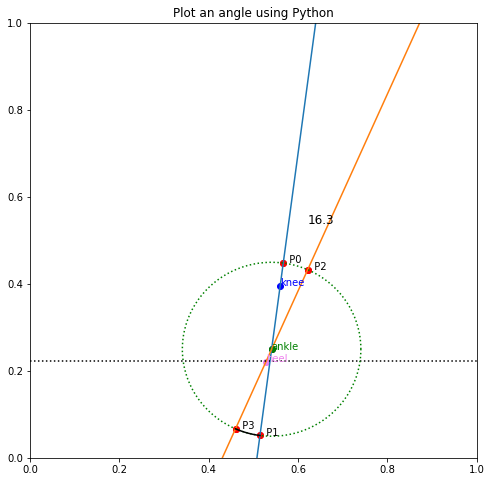

[0.571386742930885, 0.48015214170885556, 0.5825426387249721, 0.46899624591476835] [0.4411650682881265, 0.05170871959181955, 0.43820968703103547, 0.05466410084891016]
3
4.424565427855419 4.48227705195754


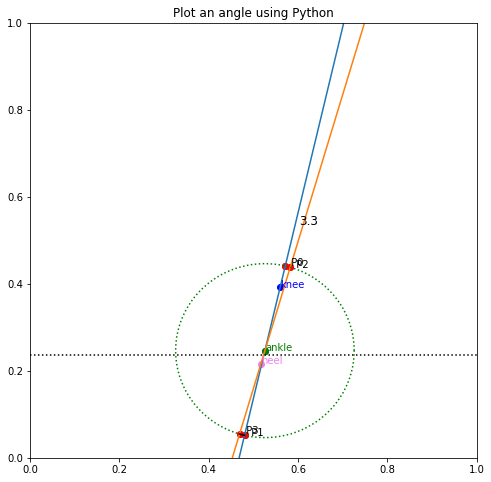

[0.5708107562842658, 0.46673945466849304, 0.5649232968163398, 0.472626914136419] [0.43174181915236165, 0.04551757835435244, 0.43323274198765427, 0.0440266555190596]
3
4.479549860425368 4.449182170102376


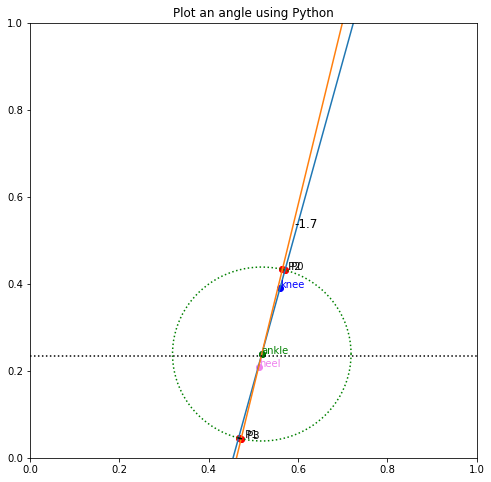

In [432]:
# print("NEUTRAL FRAMES:")
# for i,frame_step in enumerate(neutral_list):
#     print(frame_step)
#     for f in frame_step:
#         drawAngle(f)
#     print("\n\n")
try:
    for f in neutral_list[0]:
        drawAngle(f)
    print("\n\n")
except:
    print("No Values")

### Supination

[0.5735456944460754, 0.4883331655507209, 0.5672748856325421, 0.49460397436425424] [0.44437421822976253, 0.053556070085059915, 0.44563678589525635, 0.05229350241956654]
3
4.529697133509059 4.497712524436624


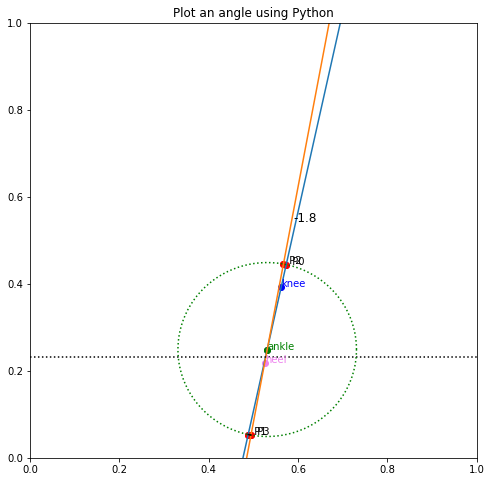

[0.5760532107969619, 0.466373911795964, 0.5609097466853118, 0.4815173759076141] [0.4391847109945881, 0.054515435680521085, 0.44287102340559104, 0.050829123269518384]
3
4.512581212408012 4.4346330829859495


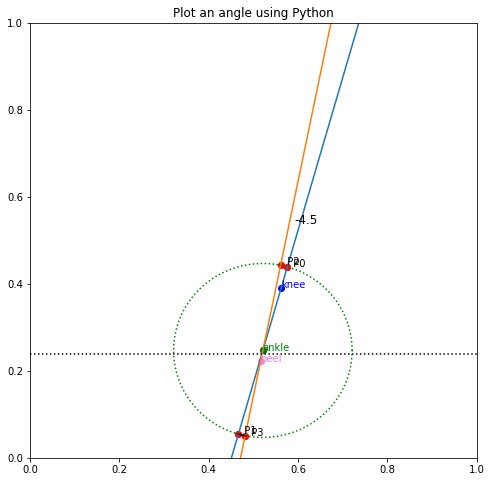

[0.5676921265754244, 0.4655211908188322, 0.5477301365587648, 0.48548318083549175] [0.43727971870642524, 0.05054841678399269, 0.4414775490007199, 0.04635058648969759]
3
4.556136554294449 4.454099301619516


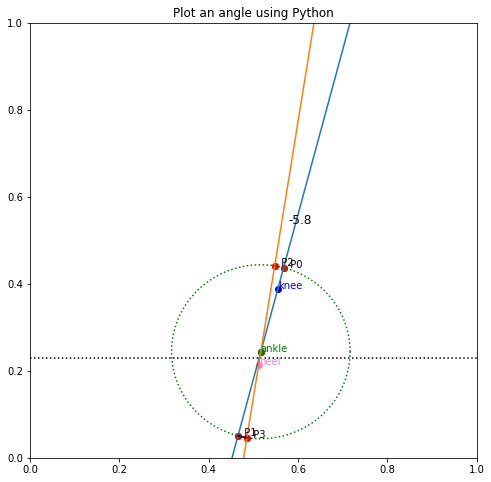

In [433]:
# for i,frame_step in enumerate(supination_list):
#     print(frame_step)
#     for f in frame_step:
#         drawAngle(f)
#     print("\n\n")
try:
    for f in supination_list[0]:
        drawAngle(f)
    print("\n\n")
except:
    print("No Values")

### Pronation

[0.553767032151346, 0.5329083733509734, 0.6012002886079201, 0.4854751168943992] [0.45080917546864896, 0.05135340025309354, 0.4425282025865169, 0.05963437313522335]
3
4.418879986867064 4.660218670924124


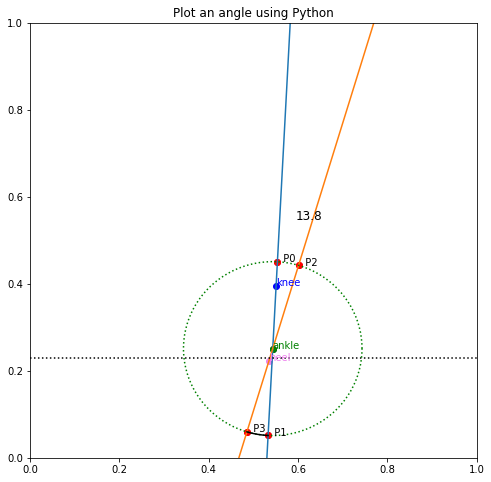




[0.5579164763983159, 0.5181141355935664, 0.602434464450459, 0.4735961475414233] [0.447033885593207, 0.04901909482976752, 0.4373679067690157, 0.05868507365395792]
3
4.384446553783703 4.612718184263999


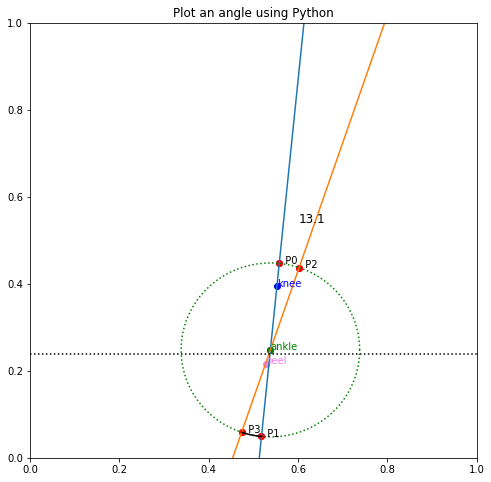




[0.5606270959609116, 0.5034339496857557, 0.57395459352158, 0.49010645212508747] [0.4399183136930205, 0.04402824812033357, 0.43752985148432044, 0.04641671032903316]
3
4.501202309620663 4.568914384621674


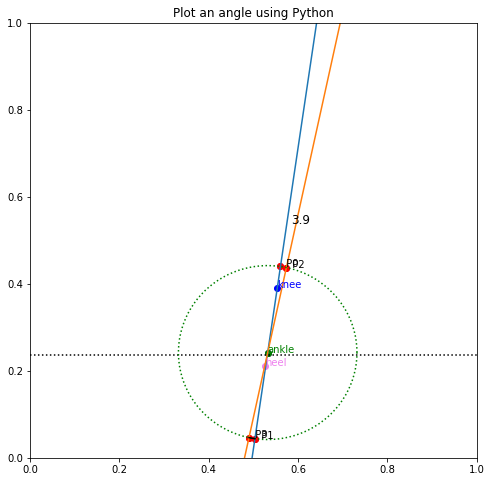

In [434]:
# for i,frame_step in enumerate(pronation_list):
#     print(frame_step)
#     for f in frame_step:
#         drawAngle(f)
#     print("\n\n")
try:
    for f in pronation_list[0]:
        drawAngle(f)
        print("\n\n")
except Exception as e:
    print(e)

### Strong Pronation

[0.5754633243930483, 0.5439738337147093, 0.6802831126409967, 0.4391540454667608] [0.44770523824342234, 0.048946649650254415, 0.40790098347658665, 0.08875090441708999]
3
4.065354848482168 4.633583712009498


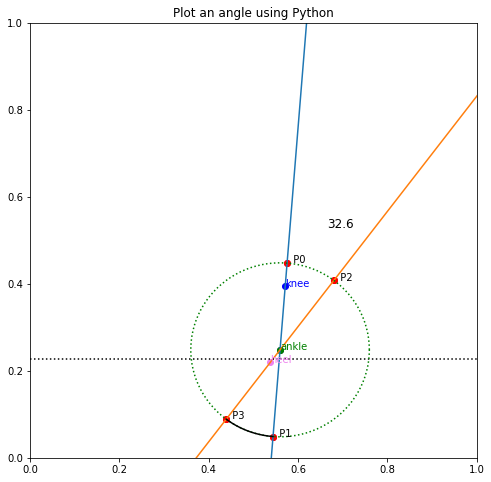




[0.5801719742379986, 0.5108841938413775, 0.6359008990691603, 0.4551552690102155] [0.440196443418329, 0.046243142267401005, 0.421637152714736, 0.06480243297099297]
3
4.243535177457124 4.53829137896683


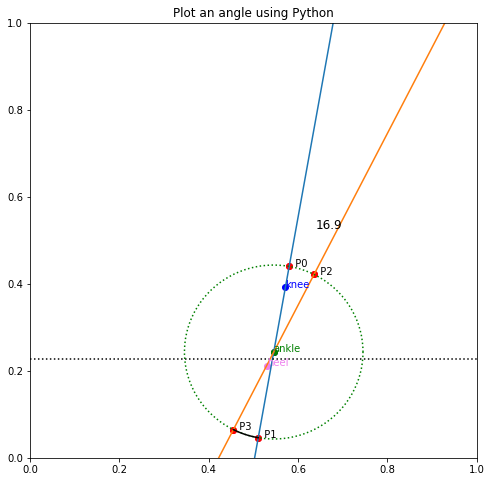




[0.5798076738596303, 0.5038204441785472, 0.6173032019476739, 0.46632491609050364] [0.43227842327033406, 0.039562315979849494, 0.42112671211882957, 0.050714027131353534]
3
4.3253525527624435 4.521259351896199


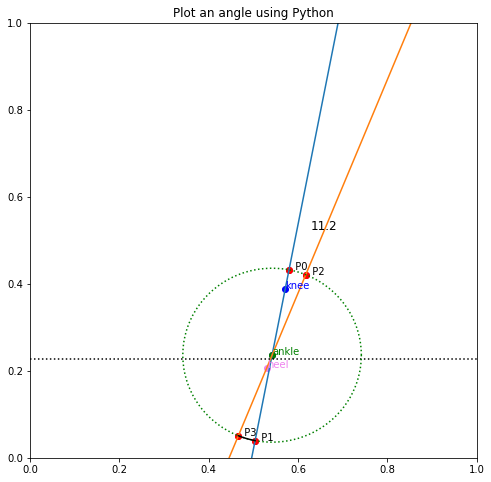

In [435]:
# for i,frame_step in enumerate(pronation_strong_list):
#     print(frame_step)
#     for f in frame_step:
#         drawAngle(f)
#     print("\n\n")
try:
    for f in pronation_strong_list[0]:
        drawAngle(f)
        print("\n\n")
except:
    print("No Values")

### Winkel Verlauf

In [436]:
import pandas as pd
import plotly.express as px
import matplotlib as mpl
df["angle"]

fig_knee = px.line(df, y="angle", title='Angle')

fig_knee.show()

## Analysis Result

In [437]:
average_overall = sum(average_list_all) / len(average_list_all)
result_pronation_pattern = checkThresholds(0, average_overall, False)
print(f'Runner left Foot has an Average Angle of {bold(np.round(average_overall, 2))} degree while stepping on the Ground')
print(f'Thats considered as {bold(result_pronation_pattern)}')   
#MEDIAN
#BOXPLOT

Runner left Foot has an Average Angle of 17.77 degree while stepping on the Ground
Thats considered as Strong Pronation


## Save Analysis in File

In [438]:
result_dict = {RUN: {"FOOT_PATTERN": result_foot_pattern, "PRONATION": {"PATTERN": result_pronation_pattern, "MEAN": average_overall}}}
saveAnalysis(RUN, result_dict)

In [439]:
loadAnalysis(RUN)

{'Laufen_7': {'FOOT_PATTERN': '', 'PRONATION': {'PATTERN': 'Strong Pronation', 'MEAN': 17.77199074074074}}}


{'Laufen_7': {'FOOT_PATTERN': '',
  'PRONATION': {'PATTERN': 'Strong Pronation', 'MEAN': 17.77199074074074}}}